In [13]:
#importing and building dataset

import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline


In [211]:
#importing data
data = pd.read_csv('/Users/matthewhockert/Desktop/UMN/Fall 20/Methods of Econ. Data Analysis/401ksubs.csv', index_col=0)
df = data.drop(columns=['Unnamed: 11','Unnamed: 12'])

In [15]:
#indexing. e401k was the original index column
df.reset_index(inplace=True)

In [16]:
print(df)

      e401k     inc  marr  male  age  fsize   nettfa  p401k  pira      incsq  \
0         0  13.170     0     0   40      1    4.575      0     1   173.4489   
1         1  61.230     0     1   35      1  154.000      1     0  3749.1130   
2         0  12.858     1     0   44      2    0.000      0     0   165.3282   
3         0  98.880     1     1   44      2   21.800      0     0  9777.2540   
4         0  22.614     0     0   53      1   18.450      0     0   511.3930   
...     ...     ...   ...   ...  ...    ...      ...    ...   ...        ...   
9270      0  58.428     1     0   33      4   -1.200      0     0  3413.8310   
9271      0  24.546     0     1   37      3    2.000      0     0   602.5061   
9272      0  38.550     1     0   33      3  -13.600      0     1  1486.1020   
9273      0  34.410     1     0   57      3    3.550      0     0  1184.0480   
9274      0  25.608     0     1   49      1    1.800      0     0   655.7697   

      agesq  
0      1600  
1      1225

In [17]:
#checking and looking for interesting values
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


In [18]:
#double check
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [19]:
# check the shape of the DataFrame (rows, columns)
data.shape

(9275, 12)

# Linear Regression


In [20]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

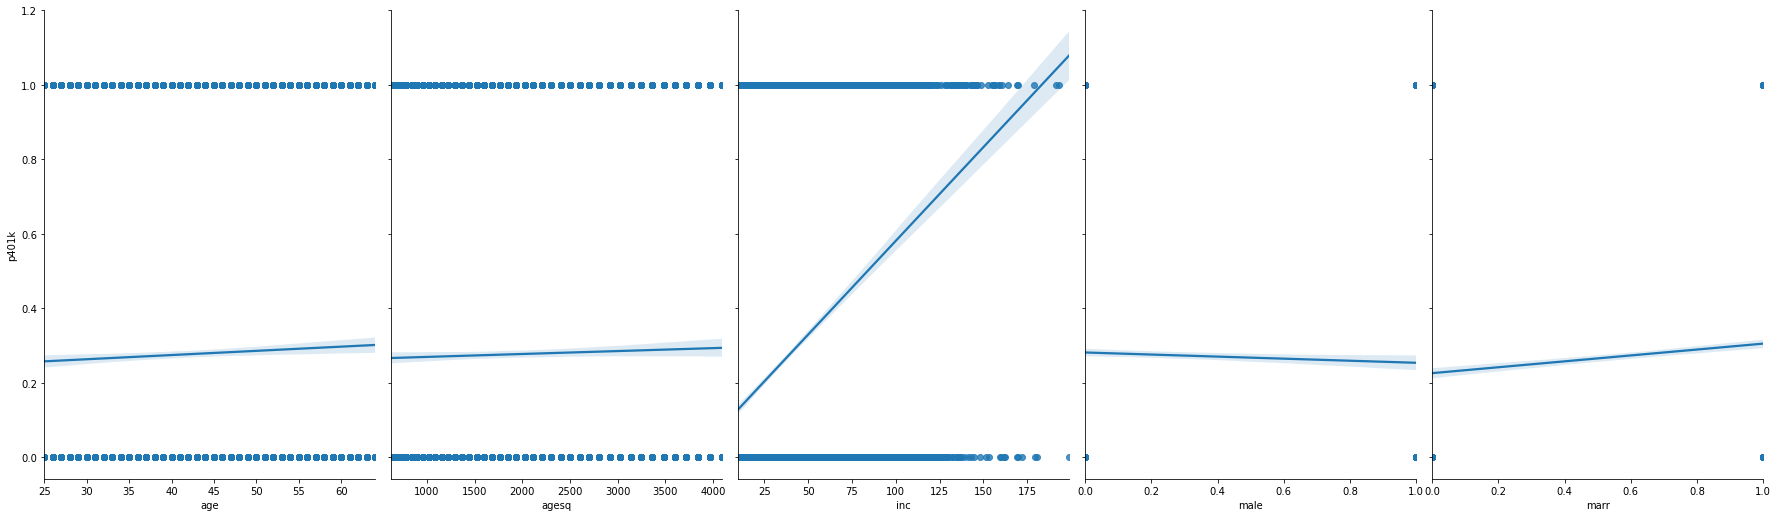

In [94]:
# visualize the relationship between the features and the response using scatterplots
#should look a little wonky
sns.pairplot(data, x_vars=['age', 'agesq', 'inc', 'male', 'marr'], y_vars='p401k', height=7, aspect=0.7, kind='reg')

In [33]:
#Linear Model
#p401k = age + age^2 + inc + marr + male

In [95]:
#building Xs
new_X = df[['age', 'agesq', 'inc', 'male', 'marr']]
new_X.head()

,age,agesq,inc,male,marr
0,40,1600,13.170,0,0
1,35,1225,61.230,1,0
2,44,1936,12.858,0,1
3,44,1936,98.880,1,1
4,53,2809,22.614,0,0


In [96]:
y = df['p401k']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: p401k, dtype: int64

In [97]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=1)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6956, 5)
(6956,)
(2319, 5)
(2319,)


In [226]:
# instantiate
linreg = LinearRegression()

# fitting the model
linreg.fit(X_train, y_train)

# printing values - #interpreting the model
print(linreg.intercept_)
list(zip(['age', 'agesq', 'inc', 'male', 'marr'], linreg.coef_))

-0.18880175566373614


[('age', 0.01434848791895438),
 ('agesq', -0.00017109444539498465),
 ('inc', 0.005065413579865749),
 ('male', -0.01355846697863755),
 ('marr', -0.017474524050167705)]

In [218]:
#making predictions
y_pred = linreg.predict(X_test)


In [219]:
#Evaluating the model
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4256626913015259


Text(0, 0.5, 'Predictions ')

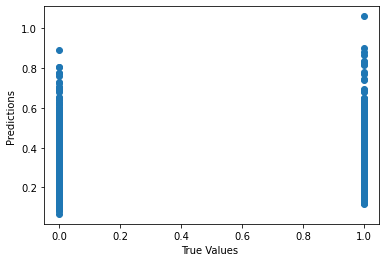

In [214]:
import matplotlib.pyplot as plt

g=plt.scatter(y_test, y_pred)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')

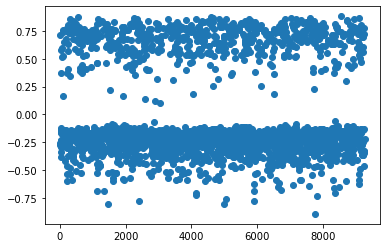

In [46]:
g=plt.plot(y_test - y_pred, marker='o',linestyle='')

In [104]:
#Cross Validation - K fold vs train test split

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [131]:
#using same Xs
Xs = ['age', 'agesq', 'inc', 'male', 'marr']
new_X = df[Xs]
new_X.head()

,age,agesq,inc,male,marr
e401k,,,,,
0,40,1600,13.170,0,0
1,35,1225,61.230,1,0
0,44,1936,12.858,0,1
0,44,1936,98.880,1,1
0,53,2809,22.614,0,0


In [132]:
#using same y
y = df['p401k']
y.head()

e401k
0    0
1    1
0    0
0    0
0    0
Name: p401k, dtype: int64

In [223]:
# 10-fold cross-validation with all three features
#Test 
lm = LinearRegression()
scores = (np.sqrt(-cross_val_score(lm, new_X, y, cv=10, scoring='neg_mean_squared_error')).mean())
print(scores)

0.4302544835878493


In [138]:
#comparing the RMSE to the train test split and 10 fold model
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4256626913015259


In [ ]:
#Overall the model didn't predict well. 
#This is expected due to the fact it is a linear model with the binary dependent variable

# KNN



In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier(n_neighbors=1)

In [141]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [144]:
#Building X values
knn_vs=['age', 'agesq', 'inc', 'male', 'marr']
knn_X = df[knn_vs]
knn_X.head()

,age,agesq,inc,male,marr
e401k,,,,,
0,40,1600,13.170,0,0
1,35,1225,61.230,1,0
0,44,1936,12.858,0,1
0,44,1936,98.880,1,1
0,53,2809,22.614,0,0


In [143]:
#Building y values
knn_y = df['p401k']
knn_y.head()

e401k
0    0
1    1
0    0
0    0
0    0
Name: p401k, dtype: int64

In [166]:
#KNN=1 model may be overfitting
knn.fit(knn_X, knn_y)
knn_y_pred = knn.predict(knn_X)
print(metrics.accuracy_score(knn_y, knn_y_pred))

0.9985983827493261


In [155]:
#What is the best value k? - Use Grid Search CV
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 31))

# create a parameter grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [156]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [158]:
# fit the grid with data
grid.fit(knn_X, knn_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [159]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.638920,0.009503,{'n_neighbors': 1}
1,0.707492,0.009244,{'n_neighbors': 2}
2,0.674284,0.009656,{'n_neighbors': 3}
3,0.709970,0.008150,{'n_neighbors': 4}
4,0.690024,0.010084,{'n_neighbors': 5}
5,0.711696,0.008651,{'n_neighbors': 6}
6,0.701452,0.012127,{'n_neighbors': 7}
7,0.715469,0.010206,{'n_neighbors': 8}
8,0.706953,0.008896,{'n_neighbors': 9}
9,0.716873,0.004500,{'n_neighbors': 10}


Text(0, 0.5, 'Cross-Validated Accuracy')

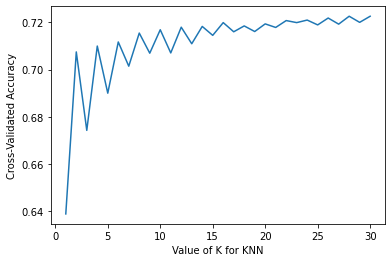

In [161]:
# plot the results - The higher the K value the better
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [162]:
# Which is the best model?
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7225871136033925
{'n_neighbors': 30}
KNeighborsClassifier(n_neighbors=30)


In [167]:
#Test the results above - The results are significantly lower than k=1 but this may indicate the model generalizes better
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(knn_X, knn_y)
y_pred_log = knn.predict(knn_X)
print(metrics.accuracy_score(knn_y, y_pred_log))

0.7366037735849057


In [168]:
#Test the train/Test Split model on KNN

In [169]:
from sklearn.model_selection import train_test_split
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.4, random_state=4)

In [171]:
#This model has a lower accuracy than the K-folds KNN model above - 0.7366037735849057
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(knn_X_train, knn_y_train)
tknn_y_pred = knn.predict(knn_X_test)
print(metrics.accuracy_score(knn_y_test, tknn_y_pred))

0.7091644204851753


In [ ]:
#The K-folds model produced a higher accuracy. This may mean that it is a better model.

# Logistic Regression


In [173]:
# import the class
from sklearn.linear_model import LogisticRegression

lx = ['age', 'agesq', 'inc', 'male', 'marr']
log_X = df[lx]
log_X.head()

,age,agesq,inc,male,marr
e401k,,,,,
0,40,1600,13.170,0,0
1,35,1225,61.230,1,0
0,44,1936,12.858,0,1
0,44,1936,98.880,1,1
0,53,2809,22.614,0,0


In [174]:
log_y = df['p401k']
log_y.head()

e401k
0    0
1    1
0    0
0    0
0    0
Name: p401k, dtype: int64

In [182]:
#Model Evaluation
logreg = LogisticRegression(solver='liblinear')
results = logreg.fit(log_X, log_y)
result.params
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  p401k   No. Observations:                 9275
Model:                          Logit   Df Residuals:                     9270
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                 0.05370
Time:                        13:54:21   Log-Likelihood:                -5172.7
converged:                       True   LL-Null:                       -5466.3
Covariance Type:            nonrobust   LLR p-value:                9.778e-126
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0863      0.004    -24.273      0.000      -0.093      -0.079
agesq          0.0009   6.09e-05     15.255      0.000       0.001       0.001
inc            0.0249      0.001     22.830      0.000       0.023       0.027
male          -0.1329      0.066     -2.023      0.043      -0.262      -0.004
marr          -0.1193      0.059     -2.039      0.041      -0.234      -0.005
==============================================================================
"""

In [183]:
#print response for new values
y_pred_log = logreg.predict(log_X)

In [184]:
# compute  accuracy for the logistic regression model
print(metrics.accuracy_score(log_y, y_pred_log))

0.7253908355795148


In [ ]:
#Cross Validation

In [186]:
#Train/Test Split
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, test_size=0.4, random_state=4)

In [187]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(6956, 5)
(2319, 5)


In [188]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(6956,)
(2319,)


In [192]:
#Model is fairly accurate and may not be overfitting
#train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(log_X_train, log_y_train)

# make predictions on the testing set
tlog_y_pred = logreg.predict(log_X_test)
# Testing accuracy
print(metrics.accuracy_score(log_y_test, tlog_y_pred))

0.7191374663072776


In [194]:
# examine the class distribution of the testing set (using a Pandas Series method)
log_y_test.value_counts()

0    2654
1    1056
Name: p401k, dtype: int64

In [195]:
# print the first 25 true and predicted responses
print('True:', log_y_test.values[0:25])
print('Pred:', tlog_y_pred[0:25])

True: [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Pred: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


In [ ]:
#Compare KNN Vs Logistic using cross-fold - Models barely differ

In [217]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=30)
print(cross_val_score(knn, knn_X, knn_y, cv=10, scoring='accuracy').mean())

0.7225871136033925


In [216]:
#K-folds - Save for the end comparing logit and KNN
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, log_X, log_y, cv=10, scoring='accuracy').mean())

0.7252841014767697
